# Theoretical Foundations of Machine Learning

## TD 1: Introduction to Python, Numpy...

### 1. Premiers pas avec Numpy et Matplotlib

#### 1.1 Numpy

In [41]:
import numpy as np

In [48]:
# Créer une matrice 8x8 à la façon d'un échéquier
E = np.ones((8,8))
E[2:6] = np.zeros((4,8))
E

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.]])

In [58]:
# Créer la matrice M et extraire la matrice m 
M = np.linspace(1,20,20)
M = M.reshape((5,4))
M = M.T


array([[ 1.,  5.,  9., 13., 17.],
       [ 2.,  6., 10., 14., 18.],
       [ 3.,  7., 11., 15., 19.],
       [ 4.,  8., 12., 16., 20.]])

#### 1.2 Matplotlib

In [59]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

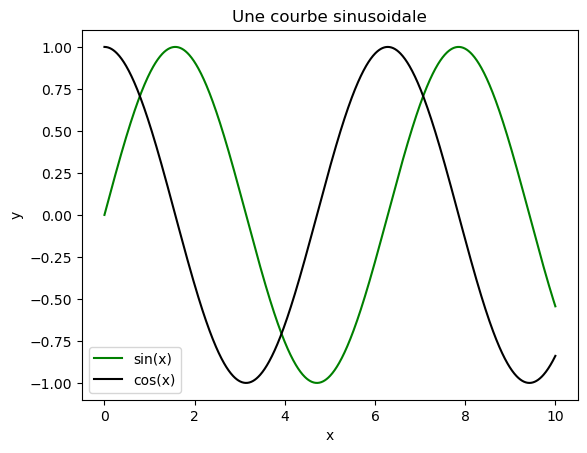

In [72]:
x = np.linspace(0,10,1000)
plt.plot(x,np.sin(x), 'g-', label = 'sin(x)')
plt.plot(x,np.cos(x), 'k-', label = 'cos(x)')
plt.title("Une courbe sinusoidale")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

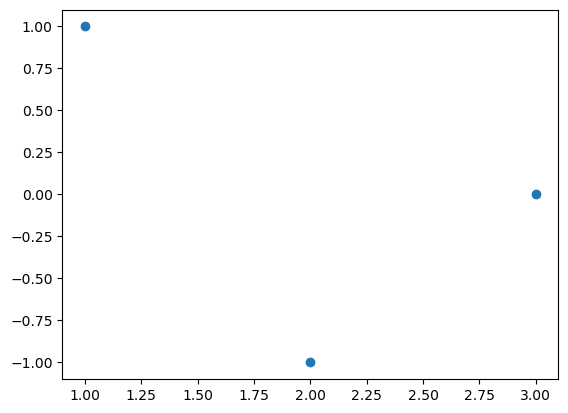

In [73]:
plt.plot([2,1,3],[-1,1,0], 'o')
plt.show

### 2. Problème de régression en dimension 1

#### 2.1 Génération des données

In [74]:
x = 2*np.random.random_sample(15)-1
x

array([-0.34122786, -0.94053503,  0.71108378,  0.97769504, -0.09127302,
        0.7803    , -0.07558759, -0.97547457, -0.71285265,  0.37078149,
       -0.12189423, -0.93772696, -0.16336267,  0.75181331, -0.17907985])

In [80]:
def g(x):
    y = (3/2)*x**3-x**2-(3/4)*x+1
    return y

In [82]:
y = g(x) + (1/20)*np.random.randn()
y

array([ 1.06004177, -0.44705511,  0.48053014,  0.69284533,  1.03913781,
        0.49871093,  1.03048377, -0.6321105 ,  0.46327134,  0.64105129,
        1.05400014, -0.43274205,  1.06944943,  0.48848468,  1.07378013])

In [85]:
x_test = 2*np.random.random_sample(30)-1
y_test = g(x_test) + (1/20)*np.random.randn()

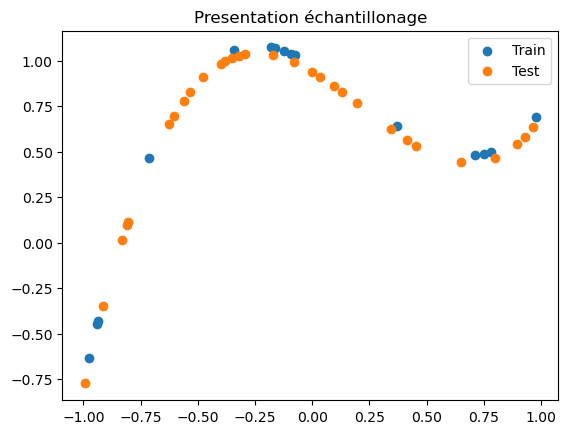

In [89]:
plt.scatter(x,y, label = "Train")
plt.scatter(x_test, y_test, label = 'Test')
plt.title("Presentation échantillonage")
plt.legend()
plt.show()

#### 2.2 Régression Linéaire

In [90]:
from sklearn.linear_model import LinearRegression 
f = LinearRegression()

In [91]:
# On met X au format dont on a besoin pour utilier la fonction .fit
X = x[:, np.newaxis]
X_test = x_test[:, np.newaxis]

In [95]:
f.fit(X,y)

0.5654612013337751

In [96]:
f.predict(X)

array([0.42064861, 0.16631058, 0.86723575, 0.98038204, 0.52672614,
       0.8966102 , 0.53338283, 0.1514827 , 0.26293597, 0.72281596,
       0.5137309 , 0.16750229, 0.49613225, 0.88452082, 0.48946208])

In [99]:
f.predict(X_test)

array([0.39581664, 0.30862051, 0.61985578, 0.58002739, 0.32738906,
       0.90392814, 0.30023144, 0.2239356 , 0.94599021, 0.42917401,
       0.21338279, 0.75787833, 0.95963127, 0.43993399, 0.64768981,
       0.33910395, 0.40372707, 0.71212739, 0.49272759, 0.74063816,
       0.60585816, 0.84084504, 0.41697491, 0.17809508, 0.56565474,
       0.3635759 , 0.97535857, 0.2221288 , 0.14371813, 0.53086989])

<function matplotlib.pyplot.show(close=None, block=None)>

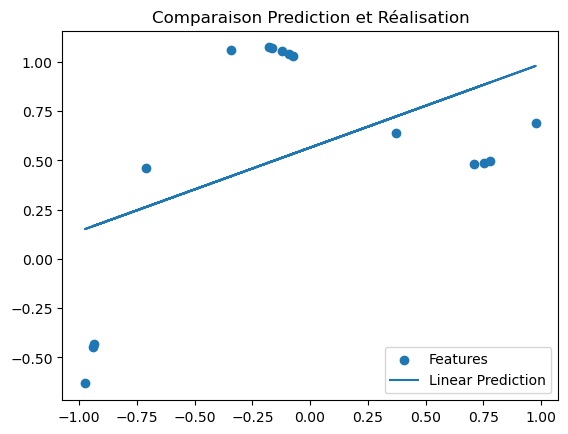

In [111]:
plt.scatter(X,y, label = "Features")
plt.plot(X, f.predict(X), label = "Linear Prediction")
plt.legend()
plt.title("Comparaison Prediction et Réalisation")
plt.show

In [113]:
# On calcule les erreurs moyennes d'apprentissage et de test
E_train = sum((y - f.predict(X))**2)
E_train

3.82524549192449

In [114]:
E_test = sum((y_test - f.predict(X_test))**2)
E_test

5.710314433421618

Le modèle n'est pas très bon car linéaire. De plus, en prenant un échantillon de test plus grand que celui de l'apprentissage, on a forcément que l'erreur est plus importante sur léchantillon test (on somme plus de terme qui sont tous positifs).

#### 2.3 Regression Polynomiale